# CS530 Data Mining Homework 5

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

#### Question 1

a. Read in the dataset ‘zip.train’ using the pandas ‘read_csv’ function. Read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) of the function to find the right parameters to properly read in this dataset. You might want to open the dataset in a text editor to inspect its structure.

In [11]:
# Your code goes here
train = pd.read_csv('/Users/gracegupta/Downloads/HW5/zip.train', sep='\s+',header=None)

In [13]:
train.shape

(7291, 257)

b. This dataset contains handwritten digits from 0 to 9. The first column contains the label (0-9) of each record. Each digit has 256 columns, each representing a pixel in a 16x16 image. Choose one row, use the ‘reshape’ function in numpy to reshape the row vector to 16x16, and use matplotlib to visualize the image.

In [33]:
# Your code goes here
row = np.array(train.iloc[0:1,1:257])
img = row.reshape([16,16])
img.shape

(16, 16)

In [176]:
train.iloc[0:1,1:257]

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.631,0.862,-0.167,...,0.304,0.823,1.0,0.482,-0.474,-0.991,-1.0,-1.0,-1.0,-1.0


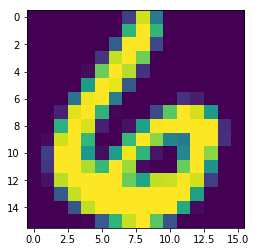

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(img)

c. Select a subset of the dataset with one digit of your choice. Perform PCA on the subset and show the percentage of variance you keep with 2 principle components. (You might want to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) to see how to properly fit and transform the dataset using scikit-learn.)

In [65]:
# Your code goes here
subset = train.loc[train.iloc[:,0] == 7.0]
subset.shape

(645, 257)

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(subset)
pca.n_components_
components = pca.transform(subset)
pca.explained_variance_ratio_

array([0.19171548, 0.11855098])

d. Plot a scatter plot of the data with the first two principal components. Find 25 records as is shown in the figure below (the red circles approximately constitute a 5x5 grid). Reshape them into images and plot them accordingly (as 5x5 [subplots](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.subplot.html)).

![plot](plot.png)

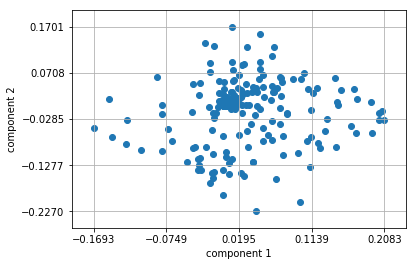

In [129]:
# Your code goes here
import matplotlib.cm

x = pca.components_[0]
y = pca.components_[1]
plt.scatter(x,y)
step_x = (max(x)-min(x))/4
step_y = (max(y)-min(y))/4

plt.xticks(np.arange(min(x), max(x)+step_x, step_x))
plt.yticks(np.arange(min(y), max(y)+step_y, step_y))
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.grid()
plt.show()

In [146]:
indexes = []
for i in range(len(pca.components_[0])):
    indexes.append([pca.components_[0][i],pca.components_[1][i]])
indexes = np.array(indexes)

In [130]:
xticks = np.array([-0.1693, -0.0749, 0.0195, 0.1139, 0.2083])
yticks = np.array([-0.2270, -0.1277, -0.0285, 0.0708, 0.1701])
grid_indexes = []
for x in xticks:
    for y in yticks:
        grid_indexes.append([x,y])
grid_indexes = np.array(grid_indexes)
len(grid_indexes)

25

In [159]:
#find the nearest points
from scipy.spatial import distance

values_to_store = []
indexes_to_store = []
for point in grid_indexes:
    distances_per_point = []
    for data in indexes:
        distances_per_point.append(distance.euclidean(point, data))
    i = np.argmin(distances_per_point) #index of point with smallest distance
    values_to_store.append(indexes[i])
    indexes_to_store.append(i)
len(indexes_to_store)

25

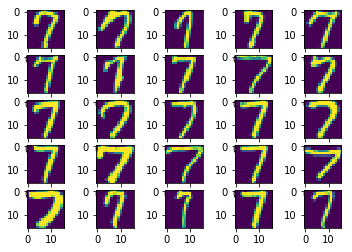

In [193]:
fig = plt.figure()
for i in range(25):
    test = np.array(subset.iloc[i,1:257])
    img = test.reshape([16,16])
    plt.subplot(5, 5, i+1)
    imgplot = plt.imshow(img)

e. Discuss what you see in the 5x5 image plot. What do you think are the features that the two principle components are capturing?

# Your discussion goes here
I think the first principle component is yellow and the second principle component is green.